# Moive Recommendation System Using Alternating Least Squares (ALS) and Autoencoder
In this project, we build a recommender engine using Apache Spark. The recommendation model is trained and tested using alternating least squares technique and Autoencoder Deep Learning framework.

In [0]:
%pip install tensorflow-cpu==2.3.*

Python interpreter will be restarted.
Requirement already satisfied: tensorflow-cpu==2.3.* in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (2.3.1)
Requirement already satisfied: google-pasta>=0.1.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (0.2.0)
Requirement already satisfied: gast==0.3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (0.3.3)
Requirement already satisfied: h5py<2.11.0,>=2.10.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (2.10.0)
Requirement already satisfied: absl-py>=0.7.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (0.11.0)
Requirement already satisfied: keras-preprocessing<1.2,>=1.1.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.1.2)
Requirement already satisfied: tensorflow-estimator<2.4.0,>=2.3.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (2.3.0)
Requirement already satisfied: tensorboard<3,>=2.3.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (2.3.0)
Requirement already satisfied: wrapt>=1.11.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.12.1)
Requirement already satisfied: opt-einsum>=2.3.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (3.3.0)
Requirement already satisfied: wheel>=0.26 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (0.34.2)
Requirement already satisfied: astunparse==1.6.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.6.3)
Requirement already satisfied: termcolor>=1.1.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.1.0)
Requirement already satisfied: protobuf>=3.9.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (3.13.0)
Requirement already satisfied: grpcio>=1.8.6 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.33.2)
Requirement already satisfied: six>=1.12.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.14.0)
Requirement already satisfied: numpy<1.19.0,>=1.16.0 in /databricks/python3/lib/python3.7/site-packages (from tensorflow-cpu==2.3.*) (1.18.1)
Requirement already satisfied: setuptools>=41.0.0 in /usr/local/lib/python3.7/dist-packages (from tensorboard<3,>=2.3.0->tensorflow-cpu==2.3.*) (45.2.0)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/python3/lib/python3.7/site-packages (from tensorboard<3,>=2.3.0->tensorflow-cpu==2.3.*) (2.22.0)
Requirement already satisfied: markdown>=2.6.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorboard<3,>=2.3.0->tensorflow-cpu==2.3.*) (3.3.3)
Requirement already satisfied: werkzeug>=0.11.15 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-ec2d29bc-32d1-4eeb-8b0e-20d5d0284acf/lib/python3.7/site-packages (from tensorboard<3,>=2.3.0->tensorflow-cpu==2.3.*) (1.0.1)
Requirement already satisfied: tensorboard-p

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pyspark.sql.functions import explode, split, concat_ws, collect_list, avg

In [0]:
import os
os.environ["PYSPARK_PYTHON"] = "python3"

## Part1: Data ETL and Data Exploration

## Data transfering and simple observations

In [0]:
# create spark session
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("moive analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [0]:
# input csv files and display each table
movies = spark.read.load("/FileStore/tables/movies.csv", format='csv', header = True)
ratings = spark.read.load("/FileStore/tables/ratings.csv", format='csv', header = True)
links = spark.read.load("/FileStore/tables/links.csv", format='csv', header = True)
tags = spark.read.load("/FileStore/tables/tags.csv", format='csv', header = True)

In [0]:
movies.show(n=10)

+-------+--------------------+--------------------+
movieId| title| genres|
+-------+--------------------+--------------------+
 1| Toy Story (1995)|Adventure|Animati...|
 2| Jumanji (1995)|Adventure|Childre...|
 3|Grumpier Old Men ...| Comedy|Romance|
 4|Waiting to Exhale...|Comedy|Drama|Romance|
 5|Father of the Bri...| Comedy|
 6| Heat (1995)|Action|Crime|Thri...|
 7| Sabrina (1995)| Comedy|Romance|
 8| Tom and Huck (1995)| Adventure|Children|
 9| Sudden Death (1995)| Action|
 10| GoldenEye (1995)|Action|Adventure|...|
+-------+--------------------+--------------------+
only showing top 10 rows

In [0]:
ratings.show(n=10)

+------+-------+------+---------+
userId|movieId|rating|timestamp|
+------+-------+------+---------+
 1| 1| 4.0|964982703|
 1| 3| 4.0|964981247|
 1| 6| 4.0|964982224|
 1| 47| 5.0|964983815|
 1| 50| 5.0|964982931|
 1| 70| 3.0|964982400|
 1| 101| 5.0|964980868|
 1| 110| 4.0|964982176|
 1| 151| 5.0|964984041|
 1| 157| 5.0|964984100|
+------+-------+------+---------+
only showing top 10 rows

In [0]:
links.show(n=10)

+-------+-------+------+
movieId| imdbId|tmdbId|
+-------+-------+------+
 1|0114709| 862|
 2|0113497| 8844|
 3|0113228| 15602|
 4|0114885| 31357|
 5|0113041| 11862|
 6|0113277| 949|
 7|0114319| 11860|
 8|0112302| 45325|
 9|0114576| 9091|
 10|0113189| 710|
+-------+-------+------+
only showing top 10 rows

In [0]:
tags.show(n=10)

+------+-------+-----------------+----------+
userId|movieId| tag| timestamp|
+------+-------+-----------------+----------+
 2| 60756| funny|1445714994|
 2| 60756| Highly quotable|1445714996|
 2| 60756| will ferrell|1445714992|
 2| 89774| Boxing story|1445715207|
 2| 89774| MMA|1445715200|
 2| 89774| Tom Hardy|1445715205|
 2| 106782| drugs|1445715054|
 2| 106782|Leonardo DiCaprio|1445715051|
 2| 106782| Martin Scorsese|1445715056|
 7| 48516| way too long|1169687325|
+------+-------+-----------------+----------+
only showing top 10 rows

In [0]:
# check minimum rating counts per user and per movie
tmp1 = ratings.groupBy("userID").count().toPandas()['count'].min()
tmp2 = ratings.groupBy("movieId").count().toPandas()['count'].min()
print('For the users that rated movies and the movies that were rated:')
print('Minimum number of ratings per user is {}'.format(tmp1))
print('Minimum number of ratings per movie is {}'.format(tmp2))

For the users that rated movies and the movies that were rated:
Minimum number of ratings per user is 20
Minimum number of ratings per movie is 1

In [0]:
# check how many movies have only one rating
tmp1 = sum(ratings.groupBy("movieId").count().toPandas()['count'] == 1)
tmp2 = ratings.select('movieId').distinct().count()
print('{} out of {} movies are rated by only one user'.format(tmp1, tmp2))

3446 out of 9724 movies are rated by only one user

### Conclusions from simple observations:
- The minimum rating counts per user is 20, means all users have enough data to analyze their movie preference.
- Some of the rated movies are only rated by 1 user (3446 out of 9724 movies), we need to be careful about this part of data.

## Spark DataFrame and OLAP

### Q1: The number of Users

In [0]:
userId_count1 = ratings.select('userId').distinct().count()
print('There are {} users rating the movies.'.format(userId_count1))
userId_count2 = tags.select('userId').distinct().count()
print('There are {} users giving tags to movies.'.format(userId_count2))

There are 610 users rating the movies.
There are 58 users giving tags to movies.

### Q2: The number of Movies

In [0]:
movie_count1 = movies.select('movieId').distinct().count()
movie_count2 = ratings.select('movieId').distinct().count()
movie_count3 = links.select('movieId').distinct().count()
movie_count4 = tags.select('movieId').distinct().count()
print('There are {} movies in total.'.format(movie_count1))
print('{} movies are rated.'.format(movie_count2))
print('{} movies are linked.'.format(movie_count3))
print('{} movies are given with tags.'.format(movie_count4))

There are 9742 movies in total.
9724 movies are rated.
9742 movies are linked.
1572 movies are given with tags.

### Q3:  How many movies are rated by users? List movies not rated before

In [0]:
movie_count2 = ratings.select('movieId').distinct().count()
print('{} movies are rated by users.'.format(movie_count2))
rating_counts = ratings.select("movieId", "timestamp").orderBy(["movieId"], ascending=[1]).groupBy("movieId").count()
movies_not_rated_before = rating_counts.select("movieId").filter(rating_counts["count"] == 1)
print("Movies that not rated before are:")
movies_not_rated_before.show(n=10)


9724 movies are rated by users.
Movies that not rated before are:
+-------+
movieId|
+-------+
 121007|
 173535|
 4032|
 3414|
 95519|
 117630|
 467|
 106594|
 139640|
 65631|
+-------+
only showing top 10 rows

### Q4: List Movie Genres

In [0]:
genres = movies.withColumn('genre', explode(split(movies.genres, '\|')))
movie_genres = genres.select('genre').distinct().filter(genres.genre != '(no genres listed)')
movie_genres.show(n=10)

+---------+
 genre|
+---------+
 Crime|
 Romance|
 Thriller|
Adventure|
 Drama|
 Fantasy|
Animation|
 Horror|
 Comedy|
 Children|
+---------+
only showing top 10 rows

### Q5: Movie for Each Category

In [0]:
movies_for_category = genres.filter(genres.genre != '(no genres listed)').groupBy('genre').agg(concat_ws(',', collect_list(genres.title)).alias('movie_lists'))
movies_for_category.show(n=10)

+-----------+--------------------+
 genre| movie_lists|
+-----------+--------------------+
 Crime|Heat (1995),Casin...|
 Romance|Grumpier Old Men ...|
 Thriller|Heat (1995),Golde...|
 Adventure|Toy Story (1995),...|
 Drama|Waiting to Exhale...|
 War|Richard III (1995...|
Documentary|Nico Icon (1995),...|
 Fantasy|Toy Story (1995),...|
 Mystery|Copycat (1995),Ci...|
 Musical|Pocahontas (1995)...|
+-----------+--------------------+
only showing top 10 rows

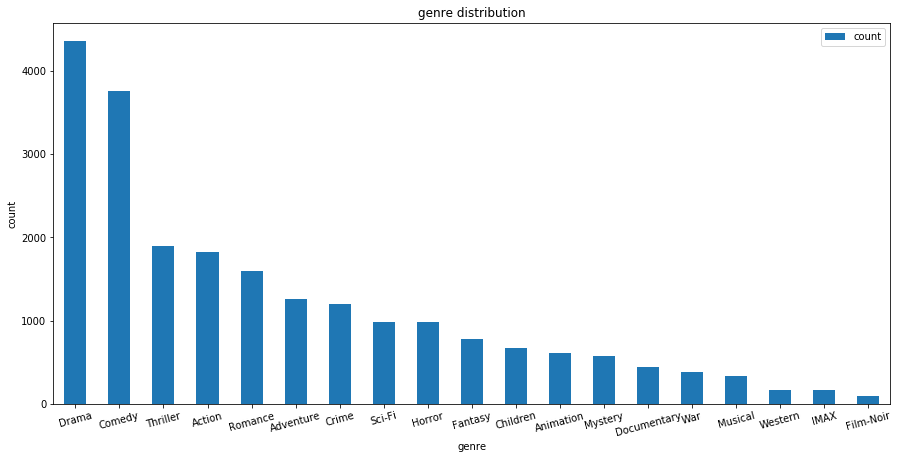

In [0]:
counts_for_category = genres.filter(genres.genre != '(no genres listed)').groupBy('genre').count()
counts_pd = counts_for_category.orderBy('count', ascending = [0]).toPandas()
fig1, ax1 = plt.subplots(figsize=(15,7))
counts_pd.plot.bar(ax = ax1, x='genre', y = 'count', rot = 15)
ax1.set_xlabel('genre')
ax1.set_ylabel('count')
ax1.set_title('genre distribution')
display(fig1)

### Conclusions from OLAP:
- Most of the movies are rated, and only 0.19% are not rated 
- There are 20 unique genres in our dataset, including "no genres listed".
- Drama, Comedy are the top 2 most common genre and their frequencies are two times more than other gernes.

## Exploratory Data Analysis (EDA)

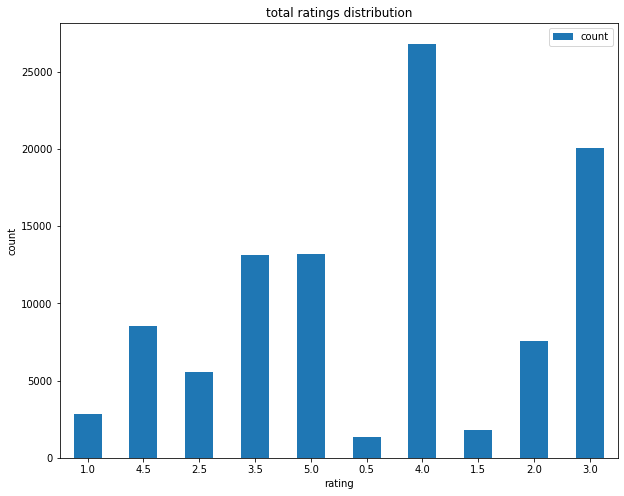

In [0]:
rating_distribution_pd = ratings.select('rating').orderBy('rating').groupBy('rating').count().toPandas()
fig2, ax2 = plt.subplots(figsize=(10,8))
rating_distribution_pd.plot.bar(ax = ax2, x='rating', y = 'count', rot = 0)
ax2.set_ylabel('count')
ax2.set_title('total ratings distribution')
display(fig2)

In [0]:
movie_ratings = ratings.select('movieId','rating').orderBy('movieId')
movie_average = movie_ratings.groupBy('movieId').agg(avg(movie_ratings.rating).alias('avg_rating'))
movie_average.show(n=10)

+-------+------------------+
movieId| avg_rating|
+-------+------------------+
 1|3.9209302325581397|
 10| 3.496212121212121|
 100|2.7857142857142856|
 100044| 4.0|
 100068| 3.5|
 100083| 3.5|
 100106| 3.5|
 100159| 4.5|
 100163| 2.9|
 100194| 4.5|
+-------+------------------+
only showing top 10 rows

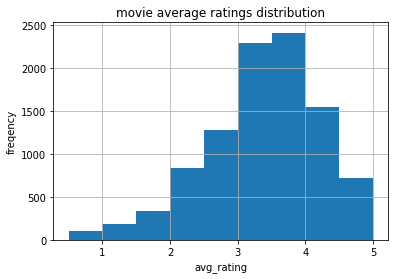

In [0]:
fig3, ax3 = plt.subplots()
pandas_movie_avg = movie_average.toPandas()
pandas_movie_avg.hist(ax=ax3, bins = 9)
ax3.set_xlabel('avg_rating')
ax3.set_ylabel('freqency')
ax3.set_title('movie average ratings distribution')
display(fig3)

In [0]:
user_ratings = ratings.select('userId','rating').orderBy('userId')
user_average = user_ratings.groupBy('userId').agg(avg(user_ratings.rating).alias('avg_rating'))
user_average.show(n=10)

+------+------------------+
userId| avg_rating|
+------+------------------+
 1| 4.366379310344827|
 10|3.2785714285714285|
 100| 3.945945945945946|
 101| 3.557377049180328|
 102| 3.357142857142857|
 103| 3.907161803713528|
 104|3.5073260073260073|
 105| 4.116343490304709|
 106|4.4393939393939394|
 107| 3.911764705882353|
+------+------------------+
only showing top 10 rows

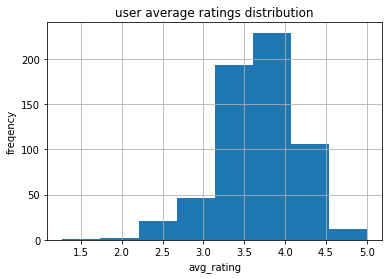

In [0]:
fig4, ax4 = plt.subplots()
pandas_user_avg = user_average.toPandas()
pandas_user_avg.hist(ax=ax4, bins = 8)
ax4.set_xlabel('avg_rating')
ax4.set_ylabel('freqency')
ax4.set_title('user average ratings distribution')
display(fig4)

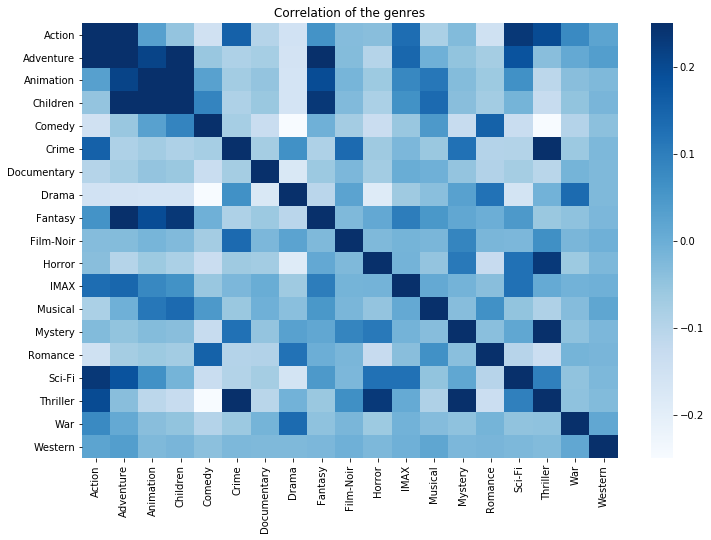

In [0]:
movies_pd = movies.toPandas()
unique_genres = sorted(movies_pd.genres.str.split("|", expand = True).stack().unique())
# create binary features for each unique genre
genre_dict = {genre:movies_pd.genres.apply(lambda s: s.find(genre) >= 0) for genre in unique_genres if genre != "(no genres listed)"}
genre_df_pd = pd.DataFrame(data = genre_dict)
# plot correlation matrix of the genres
corr = genre_df_pd.corr()
fig5, ax5 = plt.subplots(figsize = (12, 8))
plt.clf()
sns.heatmap(corr, cmap = 'Blues', vmin = -0.25, vmax = 0.25, center = 0)
plt.title("Correlation of the genres")
display(fig5)

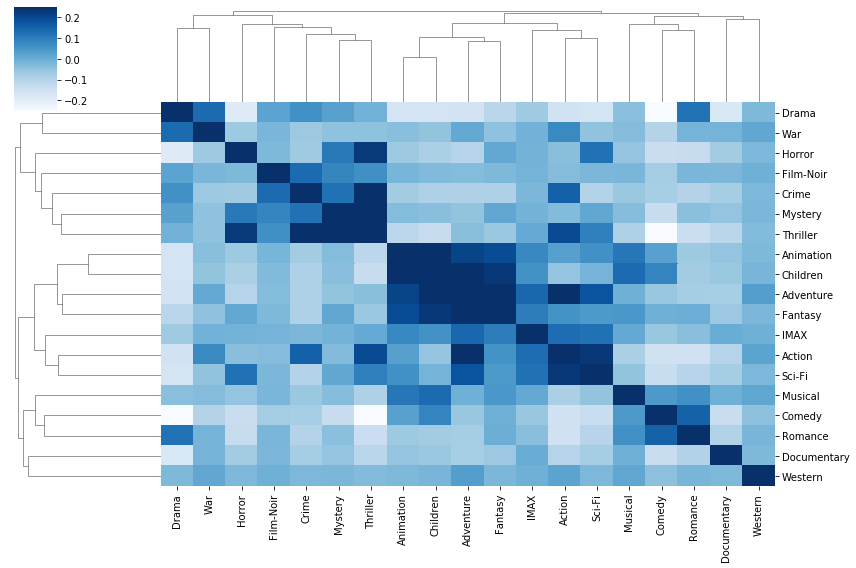

In [0]:
# cluster genres using hierarchical clustering
sns.clustermap(corr, cmap = 'Blues', vmin = -0.25, vmax = 0.25, center = 0, figsize = (12, 8))
# plt.savefig("clustermap.png", bbox_inches = "tight")

### Conclusions from EDA:
- The most common socre is 4.0 and the rarest score is 0.5. About 81% of the ratings are higher than or equal to 3.0. 
- Amost half movies have average socre between 3 and 4..
- The average socre of the movies that an user has watched is mostly distributed between 3.0 and 4.5.
- In the upper left part of clustermap:
  - Drama and War combine together.
  - Crime, Mystery and Thriller are highly correlated.
  - Horror correlate with Thriller most, then Mystery, but no Crime.
  - Film-Noir is moderately related with Crime, Mystery and Thriller.
- In the middle part of clustermap:
  - Animation, Children, Adverture and Fantasy form a big cluster.
  - Action ofter equal to Sci-Fi.
  - IMAX are close to the Action, Sci-Fi combination.
- In the lower right part of clustermap:
  - Musical, Comedy and Romance correlated moderately.
  - Documentary and Western are not close to any other genres.

## Part2: Spark ALS and Autoencoder for training model
We will use an RDD-based API from [pyspark.mllib](https://spark.apache.org/docs/2.1.1/mllib-collaborative-filtering.html) to predict the ratings, so let's reload "ratings.csv" using ``sc.textFile`` and then convert it to the form of (user, item, rating) tuples.

### Data Preparation

Separate the rating data into train, test and validation parts.

In [0]:
movie_rating = sc.textFile("/FileStore/tables/ratings.csv")

In [0]:
header = movie_rating.take(1)[0]
rating_data = movie_rating.filter(lambda line: line!=header).map(lambda line: line.split(",")).map(lambda tokens: (int(tokens[0]),int(tokens[1]),float(tokens[2]))).cache()

In [0]:
# check three rows
rating_data.take(3)

Out[26]: [(1, 1, 4.0), (1, 3, 4.0), (1, 6, 4.0)]

In [0]:
df_rating_data = spark.createDataFrame(rating_data)
df_rating_data = df_rating_data.withColumnRenamed('_1', 'userId').withColumnRenamed('_2', 'movieId').withColumnRenamed('_3', 'rating')
df_rating_data.show(n=10)

+------+-------+------+
userId|movieId|rating|
+------+-------+------+
 1| 1| 4.0|
 1| 3| 4.0|
 1| 6| 4.0|
 1| 47| 5.0|
 1| 50| 5.0|
 1| 70| 3.0|
 1| 101| 5.0|
 1| 110| 4.0|
 1| 151| 5.0|
 1| 157| 5.0|
+------+-------+------+
only showing top 10 rows

In [0]:
pd_df_rating = df_rating_data.toPandas()
#+1 is the real size, as they are zero based
num_users = pd_df_rating['userId'].unique().max() + 1
num_movies = pd_df_rating['movieId'].unique().max() + 1

Now we split the data into training/validation/testing sets using a 6/2/2 ratio.

In [0]:
train, validation, test = df_rating_data.randomSplit([0.6,0.2,0.2],seed = 7856)

In [0]:
train.cache()

Out[30]: DataFrame[userId: bigint, movieId: bigint, rating: double]

In [0]:
validation.cache()

Out[31]: DataFrame[userId: bigint, movieId: bigint, rating: double]

In [0]:
test.cache()

Out[32]: DataFrame[userId: bigint, movieId: bigint, rating: double]

### ALS Model Selection and Evaluation

With the ALS model, we can use a grid search to find the optimal hyperparameters.

In [0]:
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.stat import Correlation

In [0]:
def train_ALS(train_data, validation_data, num_iters, reg_param, ranks):
    min_error = float('inf')
    best_rank = -1
    best_regularization = 0
    best_model = None
    for rank in ranks:
        for reg in reg_param:
            # train ALS model
            als = ALS(rank=rank, maxIter=num_iters, regParam=reg, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
            model = als.fit(train_data)
            # make prediction
            predictions = model.transform(validation_data)
            # set evaluator
            evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
            # get the RMSE
            rmse = evaluator.evaluate(predictions)
            print ('{} latent factors and regularization = {}: validation RMSE is {}'.format(rank, reg, rmse))
            if rmse < min_error:
                min_error = rmse
                best_rank = rank
                best_regularization = reg
                best_model = model
    print ('\nThe best model has {} latent factors and regularization = {}'.format(best_rank, best_regularization))
    return best_model

In [0]:
num_iterations = 10
ranks = [6, 8, 10, 12, 14]
reg_params = [0.05, 0.1, 0.2, 0.4, 0.8]

import time
start_time = time.time()
final_model = train_ALS(train, validation, num_iterations, reg_params, ranks)

print ('Total Runtime: {:.2f} seconds'.format(time.time() - start_time))

6 latent factors and regularization = 0.05: validation RMSE is 0.9768418531816986
6 latent factors and regularization = 0.1: validation RMSE is 0.91325630778837
6 latent factors and regularization = 0.2: validation RMSE is 0.8932688982621029
6 latent factors and regularization = 0.4: validation RMSE is 0.9636822538510333
6 latent factors and regularization = 0.8: validation RMSE is 1.182413930915837
8 latent factors and regularization = 0.05: validation RMSE is 0.988606611857014
8 latent factors and regularization = 0.1: validation RMSE is 0.9181053130816037
8 latent factors and regularization = 0.2: validation RMSE is 0.8957834549534409
8 latent factors and regularization = 0.4: validation RMSE is 0.9632697250385888
8 latent factors and regularization = 0.8: validation RMSE is 1.1824132379764565
10 latent factors and regularization = 0.05: validation RMSE is 0.9979199374695865
10 latent factors and regularization = 0.1: validation RMSE is 0.9168149199071332
10 latent factors and regularization = 0.2: validation RMSE is 0.8957408497555838
10 latent factors and regularization = 0.4: validation RMSE is 0.9632475728901904
10 latent factors and regularization = 0.8: validation RMSE is 1.1824042961139078
12 latent factors and regularization = 0.05: validation RMSE is 0.9997658065403773
12 latent factors and regularization = 0.1: validation RMSE is 0.9180862011296318
12 latent factors and regularization = 0.2: validation RMSE is 0.8965851055568574
12 latent factors and regularization = 0.4: validation RMSE is 0.9638772417241971
12 latent factors and regularization = 0.8: validation RMSE is 1.1824020044693553
14 latent factors and regularization = 0.05: validation RMSE is 1.0027238634446671
14 latent factors and regularization = 0.1: validation RMSE is 0.9160154336490425
14 latent factors and regularization = 0.2: validation RMSE is 0.8960060705621304
14 latent factors and regularization = 0.4: validation RMSE is 0.9638460497232196
14 latent factors and regularization = 0.8: validation RMSE is 1.1824009210280226

The best model has 6 latent factors and regularization = 0.2
Total Runtime: 679.88 seconds

In [0]:
def plot_learning_curve(iter_array, train_data, validation_data, reg, rank):
  error_list = []
  for num_iters in iter_array:
    als = ALS(rank=rank, maxIter=num_iters, regParam=reg, userCol="userId", itemCol="movieId", ratingCol="rating", coldStartStrategy="drop")
    model = als.fit(train_data)
    predictions = model.transform(validation_data)
    evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
    rmse = evaluator.evaluate(predictions)
    error_list.append(rmse)
    
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  ax.plot(iter_array, error_list)
  ax.set_xlabel('iterations')
  ax.set_ylabel('RMSE')
  display(fig)

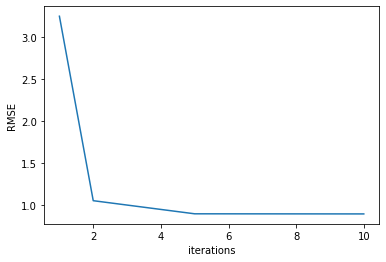

In [0]:
iter_array = [1, 2, 5, 10]
plot_learning_curve(iter_array, train, validation, 0.2, 10)

### Model testing on the test data
Finally, make prediction on testing data and check the rmse.

In [0]:
test_predictions = final_model.transform(test)
evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
test_rmse = evaluator.evaluate(test_predictions)
print('The RMSE of the test prediction is {}'.format(str(test_rmse)))

The RMSE of the test prediction is 0.8945693588944579

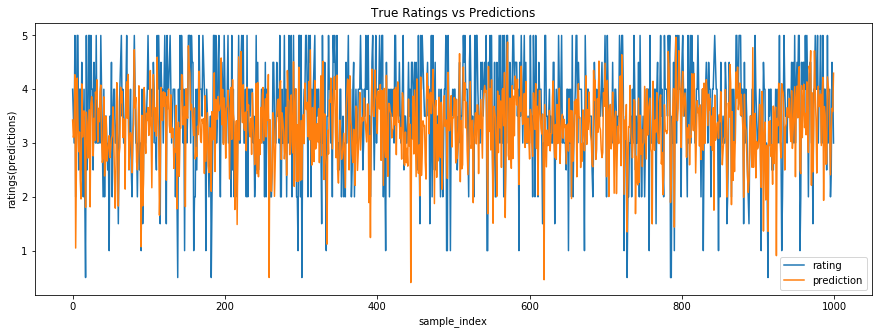

In [0]:
prediction_df = test_predictions.select('rating', 'prediction').toPandas()
fig6, ax6 = plt.subplots(figsize = (15,5))
prediction_df.sample(n = 1000, random_state = 123).reset_index(drop = True).plot.line(ax = ax6)
ax6.set_xlabel('sample_index')
ax6.set_ylabel('ratings(predictions)')
ax6.set_title('True Ratings vs Predictions')
display(fig6)

### Conclusions from ALS model generation:
- First splited the whole dataset into train, validation and test parts.
- Did grid search to `rank` and `regParam` using the train and validation parts of data, then return the best model.
- Ploted the learning curve of the model based on different `maxIter` parameters and found out that 10 is a proper assumption for this parameter.
- Implemented the final model and did prediction on test data and reached 0.89 RMSE, which demenstrate the correctness of the final model.
- Randomly pick 1000 samples from test data and draw the line plots for true and predictive ratings. The line plots share the same trend, which proves they have good correlation.

### Autoencoder Model Selection and Evaluation

### Data Processing

For Autoencoder, we need to transfer the movie rating data into matrix format and using 0 to demenstrate missing data points. Also, we need to set up functions to calculate mean square error and root mean square error using data points that is not 0. Named the function to be `masked_mse` and `masked_rmse`.

In [0]:
def dataPreprocessor(rating_df, num_users, num_items, init_value):
  matrix = np.full((num_users, num_items), init_value)
  for (_, userID, itemID, rating) in rating_df.itertuples():
    matrix[userID, itemID] = float(rating)

  return matrix

In [0]:
users_items_matrix_train = dataPreprocessor(train.toPandas(), num_users, num_movies, 0.0)
users_items_matrix_validate = dataPreprocessor(validation.toPandas(), num_users, num_movies, 0.0)
users_items_matrix_test = dataPreprocessor(test.toPandas(), num_users, num_movies, 0.0)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras import regularizers 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [0]:
def masked_mse(y_true, y_pred):
  # masked function
  mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
  # masked squared error
  masked_squared_error1 = K.square(mask_true * (y_true - y_pred))
  masked_mse = K.sum(masked_squared_error1, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1)
  return masked_mse

In [0]:
def masked_rmse_clip(y_true, y_pred):
  # masked function
  mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
  y_pred = K.clip(y_pred, 1, 5)
  # masked squared error
  masked_squared_error2 = K.square(mask_true * (y_true - y_pred))
  masked_mse = K.sqrt(K.sum(masked_squared_error2, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
  return masked_mse

### Model Training

Set up the Autoencoder, validating on different layers nodes' number, activation function, drop out rate and regularizer weights.

In [0]:
# build the Deep Autoencoder model
def Deep_AE_model(X, layers, activation, last_activation, dropout, regularizer_encode, regularizer_decode):
  # Input
  input_layer = x = Input(shape=(X.shape[1],), name='UserRating')
    
  # Encoder
  # -----------------------------
  k = int(len(layers)/2)
  i = 0
  for l in layers[:k]:
    x = Dense(l, activation=activation, name='EncLayer{}'.format(i), kernel_regularizer=regularizers.l2(regularizer_encode))(x)
    i = i+1
      
  # Latent Space
  # -----------------------------
  x = Dense(layers[k], activation=activation, name='LatentSpace', kernel_regularizer=regularizers.l2(regularizer_encode))(x)
    
  # Dropout
  x = Dropout(rate = dropout)(x)
    
  # Decoder
  # -----------------------------
  for l in layers[k+1:]:
    i = i-1
    x = Dense(l, activation=activation, name='DecLayer{}'.format(i), kernel_regularizer=regularizers.l2(regularizer_decode))(x)
      
  # Output
  output_layer = Dense(X.shape[1], activation=last_activation, name='UserScorePred', kernel_regularizer=regularizers.l2(regularizer_decode))(x)

  # this model maps an input to its reconstruction
  model = Model(input_layer, output_layer)

  return model

In [0]:
# set model parameters
layers = [256, 512, 256]
#layers = [512, 256, 128, 256, 512]
#layers = [512, 256, 512]
#layers = [128, 256, 512, 256, 128]
#layers = [512, 512, 512]
dropout = 0.8
# activation = 'sigmoid'
# last_activation = 'linear'
activation = 'selu'
last_activation = 'selu'
regularizer_encode = 0.001
regularizer_decode = 0.001

In [0]:
# train the model
Deep_AE = Deep_AE_model(users_items_matrix_train, layers, activation, last_activation, dropout, regularizer_encode, regularizer_decode)
Deep_AE.compile(optimizer = Adam(lr=0.0001), loss=masked_mse, metrics=[masked_rmse_clip]) 
Deep_AE.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
UserRating (InputLayer) [(None, 193610)] 0 
_________________________________________________________________
EncLayer0 (Dense) (None, 256) 49564416 
_________________________________________________________________
LatentSpace (Dense) (None, 512) 131584 
_________________________________________________________________
dropout (Dropout) (None, 512) 0 
_________________________________________________________________
DecLayer0 (Dense) (None, 256) 131328 
_________________________________________________________________
UserScorePred (Dense) (None, 193610) 49757770 
=================================================================
Total params: 99,585,098
Trainable params: 99,585,098
Non-trainable params: 0
_________________________________________________________________

In [0]:
hist_Deep_AE = Deep_AE.fit(x=users_items_matrix_train, y=users_items_matrix_train, epochs=200, batch_size=256, verbose=0,
                          validation_data=(users_items_matrix_train, users_items_matrix_validate))

In [0]:
def show_rmse(history, skip):
    rmse = history.history['masked_rmse_clip']
    val_rmse = history.history['val_masked_rmse_clip']
    plt.plot(np.arange(skip, len(rmse), 1), rmse[skip:])
    plt.plot(np.arange(skip, len(val_rmse), 1), val_rmse[skip:])
    plt.title('model train vs validation masked_rmse')
    plt.ylabel('rmse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

In [0]:
show_rmse(hist_Deep_AE, 100)

### Model testing on the test data

In [0]:
predict_deep = Deep_AE.predict(users_items_matrix_train)
loss = K.eval(masked_rmse_clip(users_items_matrix_test, predict_deep))
print('The RMSE of Autoencoder test prediction is {}'.format(np.mean(loss)))

The RMSE of Autoencoder test prediction is 1.0124006271362305

### Conclusions from Autoencoder model generation:
- Tested on different parameter combinations.
- We can plot the training error and validating error curve using the fitting history, but because of the limitations of Databricks, did not shown in the notebook.
- Using the final model to do prediction on test data and reached 1.012 RMSE, which is worse comparing with ALS model.